LAB: Visualización de datos usando Matplotlib
==========================================

In [1]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
%matplotlib inline

## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


Text(0.08, 0.5, 'Valor')

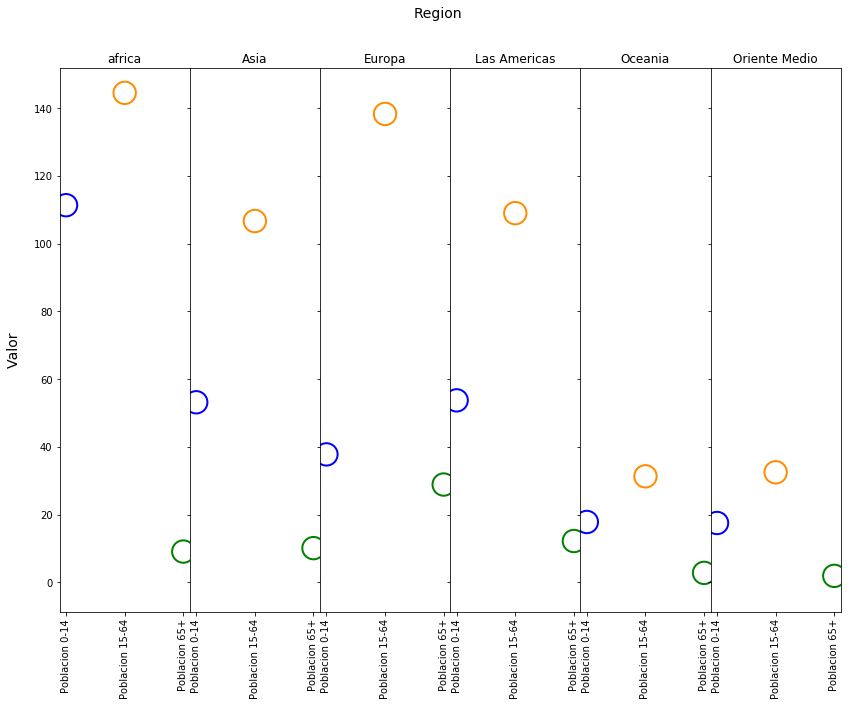

In [2]:
df = pandas.read_csv('Indicadores-mundiales.csv', sep = ',', encoding = 'latin-1')
data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64','Poblacion 65+']]
data = data.T / 100
data = data[['africa', 'Asia', 'Europa', 'Las Americas', 'Oceania', 'Oriente Medio']]

plt.style.use('seaborn-bright')
fig, axs = plt.subplots(1, len(data.columns), sharex = 'col', sharey = 'row', 
                        figsize = (14, 10));
plt.subplots_adjust(wspace = 0, hspace = 0.1)

for index, colname in enumerate(data.columns):
    axs[index].scatter(
        list(data.index),
        data[colname],
        edgecolors = ['blue', 'darkorange', 'green'],
        facecolors = 'none',
        s = 500,
        linewidths = 2
    )
    axs[index].title.set_text(colname)
    for t in axs[index].get_xticklabels():
        t.set_rotation(90)
        t.set_fontstretch('expanded')
fig.text(0.5, 0.95, 'Region', ha = 'center', fontsize = 14)
fig.text(0.08, 0.5, 'Valor', ha = 'center', rotation = 'vertical', fontsize = 14)


## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


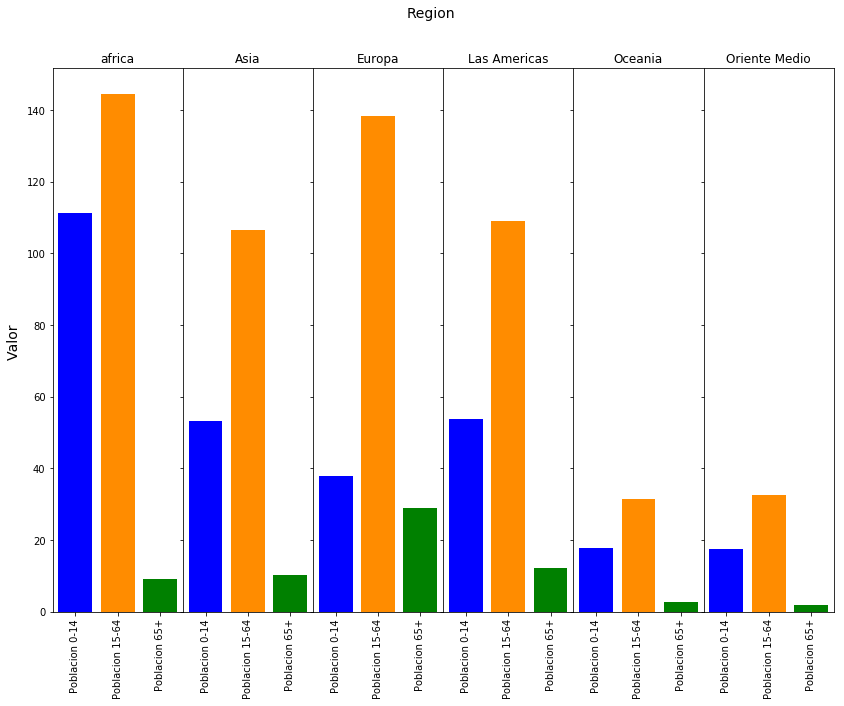

In [4]:
df = pandas.read_csv('indicadores-mundiales.csv', sep=',', encoding = 'latin-1')

data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data = data.T / 100
data = data[['africa', 'Asia', 'Europa', 'Las Americas', 'Oceania', 'Oriente Medio']]

plt.style.use('seaborn-bright')
fig, axs = plt.subplots(1, len(data.columns), sharex='col', sharey='row', figsize=(14, 10));
plt.subplots_adjust(wspace = 0, hspace = 0.1)
plt.xticks(rotation = 90)
for index, colname in enumerate(data.columns):
    axs[index].bar(list(data.index), data[colname], color = ['blue', 'darkorange', 'green'])
    axs[index].title.set_text(colname)
    for tick in axs[index].get_xticklabels():
        tick.set_rotation(90)

fig.text(0.5, 0.95, 'Region', ha = 'center', fontsize = 14)
fig.text(0.08, 0.5, 'Valor', va = 'center', rotation = 'vertical', fontsize = 14);

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

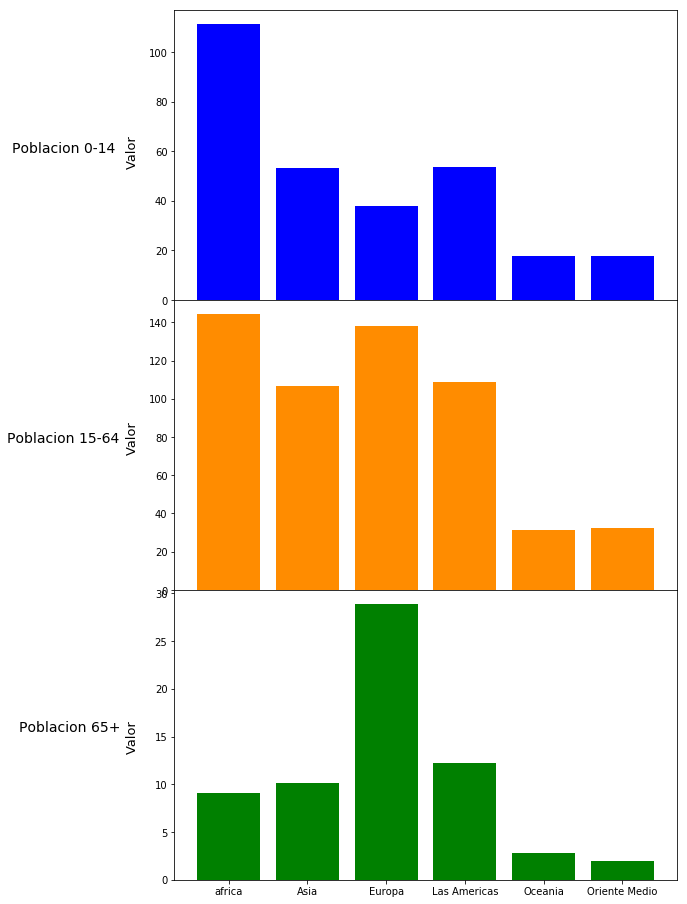

In [12]:
df = pandas.read_csv('indicadores-mundiales.csv', sep=',', encoding = 'latin-1')
data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data = data / 100
data = data.reindex(sorted(data.index, key=lambda x: x.lower()))

fig, axs = plt.subplots(3, 1, sharex = 'col', sharey = 'row', figsize = (9, 16));
plt.style.use('seaborn-bright')
plt.subplots_adjust(wspace = 0.05, hspace = 0)

colors = ['blue', 'darkorange', 'green']
y_size = [60, 80, 15]

for index, colname in enumerate(data.columns):
    axs[index].bar(list(data.index), data[colname], color = colors[index])
    axs[index].text(-1.3, y_size[index], 'Valor', va = 'center', rotation = 'vertical', fontsize = 13);
    axs[index].set_ylabel(colname, rotation = 0, labelpad = 85, fontsize = 14)

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

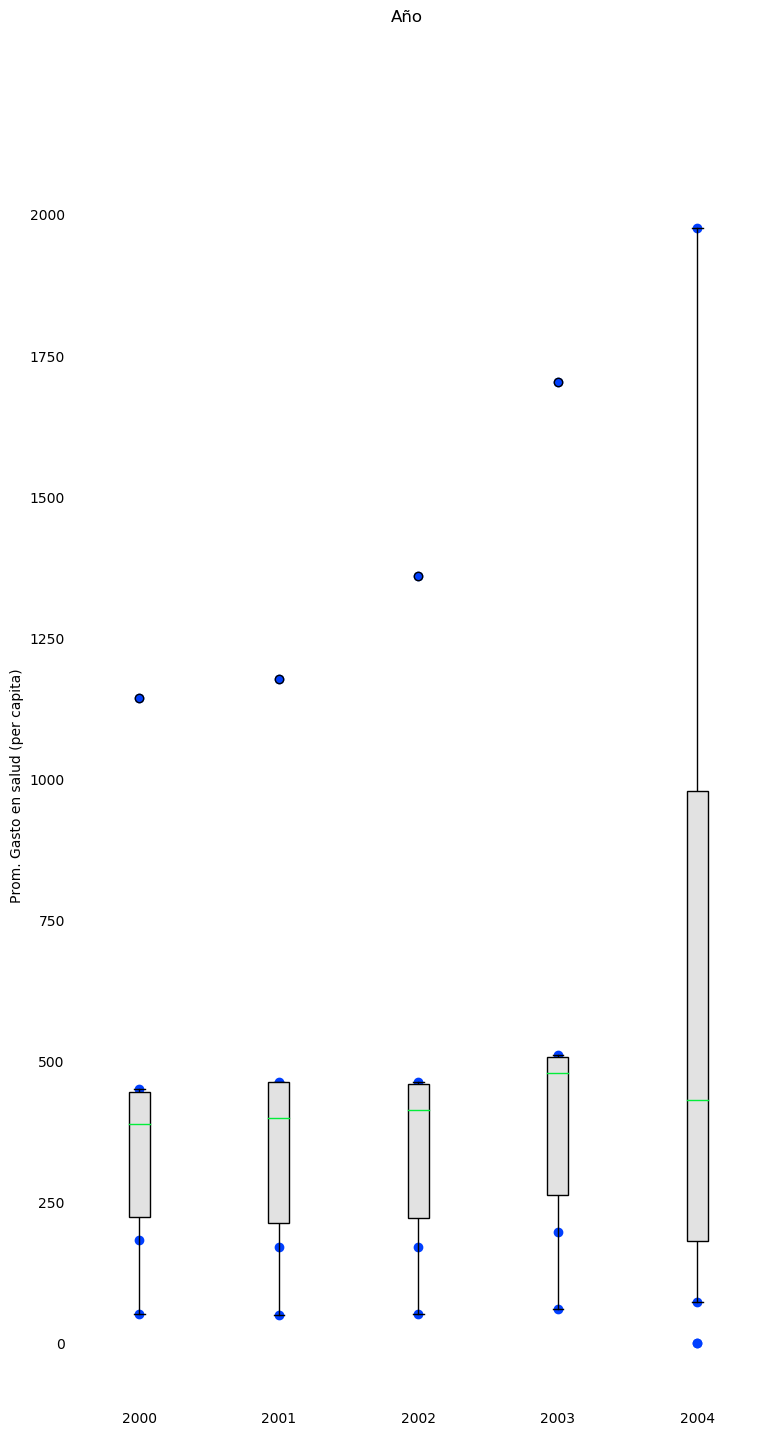

In [26]:
df = pandas.read_csv('indicadores-mundiales.csv',
                    sep=',', encoding='latin-1')
anios = []
datab = df.copy()
for i in datab['Ano']:
    anios.append(i.split("-")[0])
datab["Anio"] = anios
datab = datab.groupby(['Anio', 'Region']).mean()[['Gasto en salud (per capita)']]
data = df[['Region']].copy()
data = data.drop_duplicates()
data = data.sort_values(by = ['Region'], ascending = True)
data = data.reset_index(drop = True)
iteracion = 0
for i in range(2000, 2004):
    lista = []
    for j in range(6 * (iteracion), 6 * (iteracion + 1)):
        data[str(i)] = 0
        lista.append(int(round(datab['Gasto en salud (per capita)'][j])))
    data[str(i)] = lista
    iteracion = iteracion + 1

for i in range(1):
    lista = []
    for j in range(6 * (iteracion), 6 * (iteracion) + 4):
        data['2004'] = 0
        lista.append(int(round(datab['Gasto en salud (per capita)'][j])))
    lista.append(0)
    lista.append(0)
    data['2004'] = lista
    iteracion = iteracion + 1

data.set_index('Region', inplace = True)

plt.style.use('seaborn-bright')
fig, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(9, 16));
fig.suptitle("Año")
plt.subplots_adjust(wspace = 0.00, hspace=0.0)
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for index, colname in enumerate(data.columns):
    if (index != 4):
        axs[index].scatter([1, 1, 1, 1, 1, 1], data[colname])
        box = axs[index].boxplot(data[colname], patch_artist = True)
        colors = ['#e2e2e2', '#e2e2e2', '#e2e2e2', '#e2e2e2', '#e2e2e2']
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        axs[index].set_xlabel(colname)
        axs[index].set_xticklabels([])
    else:
        axs[index].scatter([1, 1, 1, 1, 1, 1], data[colname])
        box = axs[index].boxplot(data[colname][0:4], patch_artist = True)
        colors = ['#e2e2e2', '#e2e2e2', '#e2e2e2', '#e2e2e2', '#e2e2e2']
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        axs[index].set_xlabel(colname) 
        axs[index].set_xticklabels([])
    if (index == 0):
        axs[index].set_ylabel('Prom. Gasto en salud (per capita)')
    axs[index].tick_params(axis = u'both', which = u'both', length = 0)
    axs[index].spines['bottom'].set_color('#ffffff')
    axs[index].spines['top'].set_color('#ffffff') 
    axs[index].spines['right'].set_color('#ffffff')
    axs[index].spines['left'].set_color('#ffffff')

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

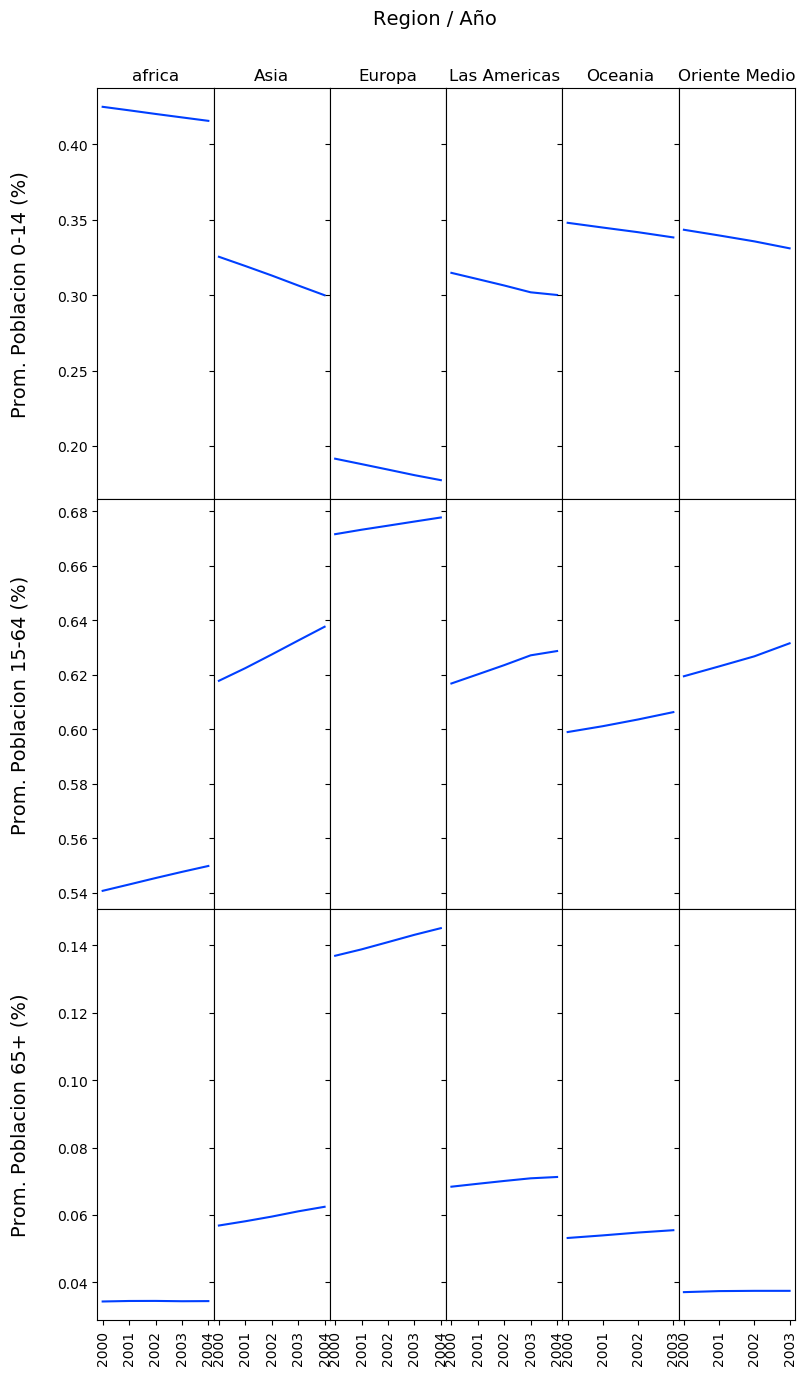

In [27]:
df = pandas.read_csv('indicadores-mundiales.csv', sep = ',', encoding = 'latin-1')
df['year'] = df['Ano'].apply(lambda x: x.split('-')[0])
data = df.groupby(['Region', 'year']).mean()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data = data / 100.0

fig, axs = plt.subplots(3, 6, sharex = 'col', sharey = 'row', figsize = (9, 16));
plt.style.use('seaborn-bright')
plt.subplots_adjust(wspace = 0, hspace = 0)

columns = [f'Prom. {col} (%)' for col in data.columns]
index_region = ['africa', 'Asia', 'Europa', 'Las Americas', 'Oceania', 'Oriente Medio']

fig.text(0.5, 0.92, 'Region / Año', ha = 'center', fontsize = 14)

for index, colname in enumerate(data.columns):
    axs[index][0].set_ylabel(columns[index], labelpad = 20, fontsize = 14)
    for i, r in enumerate(index_region):
        axs[0][i].title.set_text(r)
        axs[index][i].plot(data.loc[r, colname])
        for tick in axs[index][i].get_xticklabels():
            tick.set_rotation(90)

---